#  KNN-classification-iris-練習
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [2]:
import pandas as pd
df = pd.read_csv('iris_two_group.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species,target
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1
146,6.3,2.5,5.0,1.9,virginica,1
147,6.5,3.0,5.2,2.0,virginica,1
148,6.2,3.4,5.4,2.3,virginica,1


In [22]:
# 定義 X , y 
cols=['sepal_length','sepal_width','petal_length', 'petal_width']
X = df[cols]
y = df['species']

In [23]:
X.shape , y.shape

((150, 4), (150,))

In [24]:
# 分割資料 30% 用來test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1234)
X_train.shape, X_test.shape, y_train.shape , y_test.shape

91     versicolor
63     versicolor
103     virginica
6          setosa
59     versicolor
29         setosa
27         setosa
35         setosa
99     versicolor
122     virginica
82     versicolor
42         setosa
117     virginica
61     versicolor
43         setosa
79     versicolor
100     virginica
25         setosa
108     virginica
94     versicolor
74     versicolor
54     versicolor
51     versicolor
73     versicolor
109     virginica
48         setosa
123     virginica
92     versicolor
102     virginica
11         setosa
98     versicolor
126     virginica
40         setosa
133     virginica
77     versicolor
24         setosa
8          setosa
20         setosa
22         setosa
93     versicolor
36         setosa
68     versicolor
32         setosa
141     virginica
125     virginica
Name: species, dtype: object

In [25]:
# 請將 n_neighbors= 不要超過總樣本數開根號
from sklearn.neighbors import KNeighborsClassifier 
#加入n ,把 accuracy 設為一個空的list
accuracy = []
for n in range(1,13,1):
    clf = KNeighborsClassifier(n_neighbors= n)
    clf.fit(X_train,y_train)
    accuracy.append((clf.score(X_train,y_train),clf.score(X_test,y_test)))

In [26]:
accuracy #小括弧裡為tuple

[(1.0, 0.9777777777777777),
 (0.9714285714285714, 0.9777777777777777),
 (0.9619047619047619, 0.9777777777777777),
 (0.9523809523809523, 0.9555555555555556),
 (0.9714285714285714, 1.0),
 (0.9619047619047619, 1.0),
 (0.9714285714285714, 0.9777777777777777),
 (0.9714285714285714, 0.9777777777777777),
 (0.9809523809523809, 1.0),
 (0.9809523809523809, 1.0),
 (0.9714285714285714, 1.0),
 (0.9714285714285714, 1.0)]

In [27]:
# 抽出第 i 欄 , 口訣 i for i in data
train_score = [t[0] for t in accuracy ]
test_score = [t[1] for t in accuracy ]

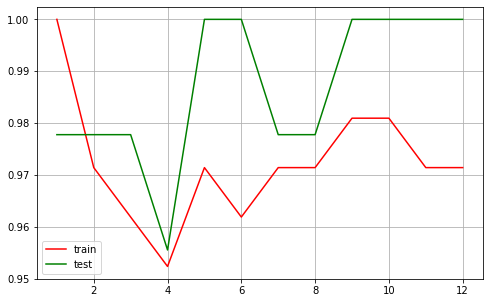

In [28]:
#畫圖
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(range(1,13,1),train_score, color='red',label='train')
plt.plot(range(1,13,1),test_score, color='green',label='test')
plt.grid()
plt.legend()
plt.show()

In [29]:
# 建立 n_neighbors=? 的 KNN模型 
# if n_neighbors=1
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train) 

# Confusion matrix    
predicted_labels = clf.predict(X_test)
true_labels = y_test

from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(true_labels, predicted_labels)

print(classification_report(true_labels, predicted_labels))

print("Confusion matrix")
print(cm)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      1.00      1.00        17
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion matrix
[[16  0  0]
 [ 0 17  0]
 [ 0  0 12]]


In [30]:
import pickle
pickle.dump(clf, open('iris_knn.pkl', 'wb'))